# **Support Vector Machines (SVMs)**

**Theory/Concept**

Support Vector Machines (SVMs) are supervised learning models used for **classification** and **regression** tasks. While they can do both, they are most famously known for their classification prowess.

The core idea behind SVMs for classification is to find an optimal hyperplane that best separates data points of different classes in a high-dimensional space. The "optimal" hyperplane is one that has the largest margin between the two classes.

* **Hyperplane:** In a 2D space, a hyperplane is a line. In a 3D space, it's a plane. In higher dimensions, it's a hyperplane.

* **Margin:** The distance between the hyperplane and the closest data points from each class. These closest points are called **support vectors**. The SVM aims to maximize this margin, as a larger margin generally leads to better generalization (less overfitting).

**Key Concepts:**

1. **Linear SVM:** When data is linearly separable, a straight line (or plane/hyperplane) can perfectly separate the classes.

2. **Non-linear SVM (Kernel Trick):** What if the data isn't linearly separable in its original feature space? This is where the **kernel trick** comes in. SVMs can implicitly map the input features into a higher-dimensional feature space where they might become linearly separable.

* **Common Kernels:**

    * **Linear:** No mapping, acts like a simple linear classifier.

    * **Polynomial:** Transforms features by polynomial combinations.

    * **RBF (Radial Basis Function) / Gaussian:** Maps samples into an infinite-dimensional space, effective for non-linear boundaries. This is the most popular kernel.

    * **Sigmoid:** Uses a sigmoid function.

**Soft Margin SVM:** In real-world data, perfect linear separation is rare, and outliers exist. A "soft margin" allows for some misclassifications (violations of the margin) to achieve a more robust and generalizable model. This is controlled by the `C` hyperparameter.

**Use Cases**

* **Text Classification:** Spam detection, sentiment analysis.

* **Image Recognition:** Object detection, facial recognition.

* **Bioinformatics:** Protein classification, cancer detection.

* **Handwritten Digit Recognition.**

**Pros and Cons**

**Pros:**

* **Effective in high-dimensional spaces** (e.g., text data with many words as features).

* **Effective when the number of features is greater than the number of samples.**

* **Memory efficient** because they use a subset of training points (support vectors) in the decision function.

* **Versatile** due to the use of different kernel functions.

**Cons:**

* **Can be slow** to train on large datasets (especially with non-linear kernels).

* **Challenging to interpret** the learned model (black box).

* **Sensitive to the choice of kernel function and hyperparameters.**

* **Not directly provide probability estimates** (though predict_proba is available, it's computed differently than, say, Logistic Regression).

**Implementation** with `scikit-learn`(iris dataset)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# 1. load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2] #we'll just use the first two features for easy visualization
y = iris.target

print(f"Iris dataset: {X[:5]}, \n{y[:5]}")

Iris dataset: [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]], 
[0 0 0 0 0]


In [3]:
# 2. split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print(f'X_train data: {X_train[:5]}, \n{y_train[:5]}')

X_train data: [[7.4 2.8]
 [4.6 3.4]
 [5.6 2.7]
 [5.7 2.9]
 [5.  3.4]], 
[2 0 1 1 0]


In [4]:
# 3. scale features (important for SVM, especially with RBF kernel)
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [5]:
# 3. Instantiate and train the SVM model (with RBF kernel)
# C: Regularization parameter. Smaller C MEANS stronger regularization (more margin violation allowed).
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. Determines the influence of single training examples.
#  Smaller gamma means wider influence.
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # 'scale' uses 1 / (n_features * X.var())
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [6]:
# 5. Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
print(f"Predictions: {y_pred_svm[:5]}") 

Predictions: [0 1 0 0 1]


In [7]:
# 6. Evaluate the Model
print("--- Support Vector Machine (SVM) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

--- Support Vector Machine (SVM) ---
Accuracy: 0.7500

Confusion Matrix:
 [[20  0  0]
 [ 0 14  6]
 [ 0  9 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.61      0.70      0.65        20
           2       0.65      0.55      0.59        20

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



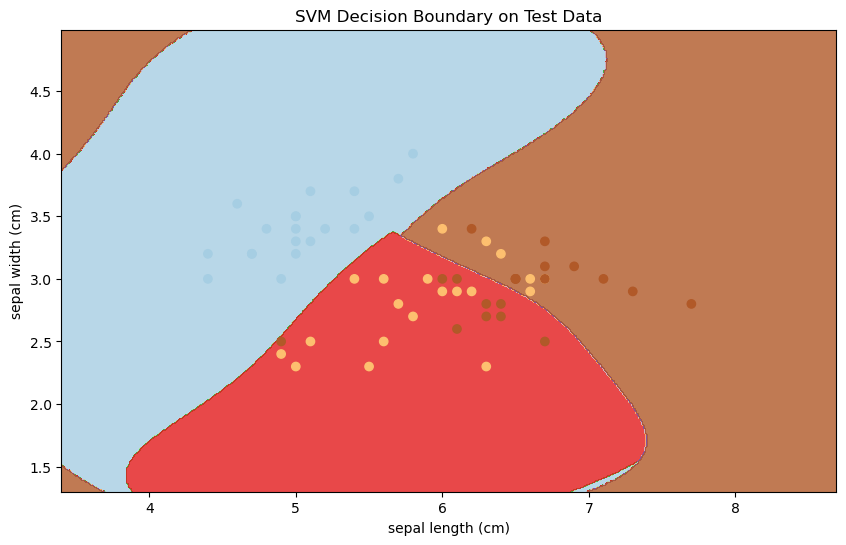

In [9]:
# Plotting the decision boundary (only works easily for 2 features)
def plot_decision_boundary(X, y,  model, title, scalar=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if scalar: # if data was scaled, scale the meshgrid points too
        Z = model.predict(scalar.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

plot_decision_boundary(X_test, y_test, svm_model, "SVM Decision Boundary on Test Data", scalar)

In [10]:
# Important Hyperparameters for SVC:
# - C: (float) Regularization parameter. The strength of the regularization is inversely proportional to C.
#      It controls the trade-off between achieving a low training error and a large margin.
# - kernel: ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed') Specifies the kernel type to be used in the algorithm.
# - gamma: ('scale', 'auto' or float) Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
#      'scale' (default) uses 1 / (n_features * X.var())
#      'auto' uses 1 / n_features
# - degree: (int) Degree of the polynomial kernel function ('poly'). Ignored by other kernels.
# - class_weight: (dict or 'balanced') Weights associated with classes. Useful for imbalanced datasets.